In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import ufloat
from uncertainties.umath import atan2
from scipy.optimize import curve_fit

# during raw measurements

### 3.1

In [4]:
# get the RF gen. input voltages
def get_V_in(Vout, gain):
    f = gain/20
    denom = 10**f
    return Vout/denom
# get in mVpp
# 33.78 for 24V
Vin_500mW = get_V_in(14.16*10**3, 33.72) #gain is by 23V and 98.80 (AOM central freq: 80 MHz)
Vin_1000mW = get_V_in(20*10**3, 33.72)
Vin_2000mW = get_V_in(28.3*10**3, 33.72)
print(Vin_500mW, Vin_1000mW, Vin_2000mW)

291.78519571903206 412.1259826540001 583.1582654554102


In [5]:
# 3.1 bragg angle
AOM_mes_dist = ufloat(9.5, 0.2) + ufloat(15.0, 0.2)  + ufloat(32.3, 0.2) # in cm
order_dist = ufloat(0.7,0.1) # in cm
theta = atan2(order_dist,AOM_mes_dist)
bragg = theta/2
bragg *= 1000 #in mrad
bragg

6.16165990016459+/-0.8809497076100029

### 3.2

In [6]:
# 3.2
# without RF power
IL = 1 - (ufloat(0.858, 0.001)/ufloat(0.904, 0.001))
IL

0.05088495575221241+/-0.0015251128970142295

In [7]:
#3.2
# with RF power change and record the power
power_noise = ufloat(0.65e-3,0.05e-3)
RF_power_watt = np.array([2.00, 1.58, 1.26, 1.00, 0.794, 0.631, 0.501, 0.398, 0.316, 0.250, 0.200, 0.158, 0.126,0.100])
raw_data_3_2 = np.array([[RF_power_watt[0], ufloat(0.728,0.001) - power_noise, ufloat(59.6e-3,0.2e-3) - power_noise],
                         [RF_power_watt[1], ufloat(0.769,0.001) - power_noise, ufloat(20.4e-3,0.2e-3) - power_noise],
                         [RF_power_watt[2], ufloat(0.775,0.001) - power_noise, ufloat(26.3e-3,0.2e-3) - power_noise],
                         [RF_power_watt[3], ufloat(0.746,0.001) - power_noise, ufloat(64.7e-3,0.2e-3)- power_noise], 
                         [RF_power_watt[4], ufloat(0.691,0.001) - power_noise, ufloat(126.0e-3,0.2e-3) - power_noise],
                         [RF_power_watt[5], ufloat(0.621,0.001) - power_noise, ufloat(0.202,0.001) - power_noise],
                         [RF_power_watt[6], ufloat(0.546,0.001) - power_noise, ufloat(0.282,0.001) - power_noise],
                         [RF_power_watt[7], ufloat(0.469,0.001) - power_noise, ufloat(0.361,0.001) - power_noise],
                         [RF_power_watt[8], ufloat(0.399,0.001) - power_noise, ufloat(0.437,0.001) - power_noise],
                         [RF_power_watt[9], ufloat(0.331,0.001) - power_noise, ufloat(0.504,0.001) - power_noise],
                         [RF_power_watt[10], ufloat(0.274,0.001) - power_noise, ufloat(0.561,0.001) - power_noise],
                         [RF_power_watt[11], ufloat(0.225,0.001) - power_noise, ufloat(0.611,0.001) - power_noise],
                         [RF_power_watt[12], ufloat(0.183,0.001) - power_noise, ufloat(0.650,0.001) - power_noise],
                         [RF_power_watt[13], ufloat(0.148,0.001) - power_noise, ufloat(0.686,0.001) - power_noise]])

data_3_2 = pd.DataFrame(raw_data_3_2, columns=["RF_power/Watt", "power_1st/mW", "power_0th/mW"])
data_3_2

,RF_power/Watt,power_1st/mW,power_0th/mW
0,2.0,0.7273+/-0.0010,0.05895+/-0.00021
1,1.58,0.7683+/-0.0010,0.01975+/-0.00021
2,1.26,0.7743+/-0.0010,0.02565+/-0.00021
3,1.0,0.7453+/-0.0010,0.06405+/-0.00021
4,0.794,0.6903+/-0.0010,0.12535+/-0.00021
5,0.631,0.6203+/-0.0010,0.2014+/-0.0010
6,0.501,0.5454+/-0.0010,0.2813+/-0.0010
7,0.398,0.4683+/-0.0010,0.3604+/-0.0010
8,0.316,0.3984+/-0.0010,0.4364+/-0.0010
9,0.25,0.3304+/-0.0010,0.5033+/-0.0010


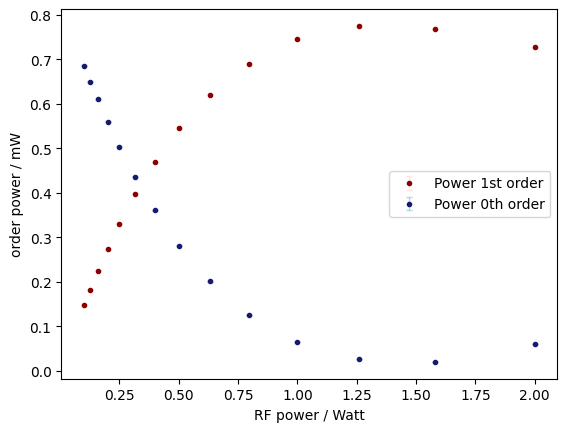

In [8]:
plt.errorbar(np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))]), 
        np.array([data_3_2["power_1st/mW"][i].n for i in range(len(data_3_2["power_1st/mW"]))]),
            yerr=np.array([data_3_2["power_1st/mW"][i].s for i in range(len(data_3_2["power_1st/mW"]))]),markersize=6,
             fmt=".", elinewidth=1, capsize=2, color="darkred", ecolor="mistyrose", label="Power 1st order")
plt.errorbar(np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))]), 
        np.array([data_3_2["power_0th/mW"][i].n for i in range(len(data_3_2["power_0th/mW"]))]),
            yerr=np.array([data_3_2["power_0th/mW"][i].s for i in range(len(data_3_2["power_0th/mW"]))]),markersize=6,
             fmt=".", elinewidth=1, capsize=2,color="midnightblue", ecolor="lightblue", label="Power 0th order")
plt.xlabel("RF power / Watt")
plt.ylabel("order power / mW")
plt.legend(loc='center right')
plt.show()

In [9]:
# fit function to get epsilon
def epsilon_pow(RF_power, Sat_power, A, B):
    norm_power = RF_power/Sat_power
    arg = np.sqrt(norm_power) * np.pi/2
    return A*(np.sin(arg)**2) + B
    
p_out = ufloat(0.858, 0.001)
epsilon_data = data_3_2["power_1st/mW"] / p_out
epsilon_data

0     0.8477+/-0.0015
1     0.8955+/-0.0016
2     0.9025+/-0.0016
3     0.8687+/-0.0015
4     0.8046+/-0.0015
5     0.7230+/-0.0014
6     0.6356+/-0.0014
7     0.5459+/-0.0013
8     0.4643+/-0.0013
9     0.3850+/-0.0013
10    0.3186+/-0.0012
11    0.2615+/-0.0012
12    0.2125+/-0.0012
13    0.1717+/-0.0012
Name: power_1st/mW, dtype: object

In [10]:
# performing fit
RF_power = np.array([data_3_2["RF_power/Watt"][i] for i in range(len(data_3_2["RF_power/Watt"]))])
epsilon_data_nominal = np.array([epsilon_data[i].n for i in range(len(epsilon_data))])
epsilon_data_unc = np.array([epsilon_data[i].s for i in range(len(epsilon_data))])
popt, pcov = curve_fit(epsilon_pow, RF_power, epsilon_data_nominal, sigma=epsilon_data_unc, absolute_sigma=True, p0=[1,0, 0])
print("Fit results:", "\n", "P_sat = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), 
      "\n", "A = ", popt[1], "+/-", np.sqrt(np.diag(pcov)[1]),  
      "\n", "B = ", popt[2], "+/-", np.sqrt(np.diag(pcov)[2]))

Fit results: 
 P_sat =  1.3545870137635092 +/- 0.0022462875347001817 
 A =  0.893625496886942 +/- 0.0012915221221476629 
 B =  0.02991699900707807 +/- 0.0009317569465440622


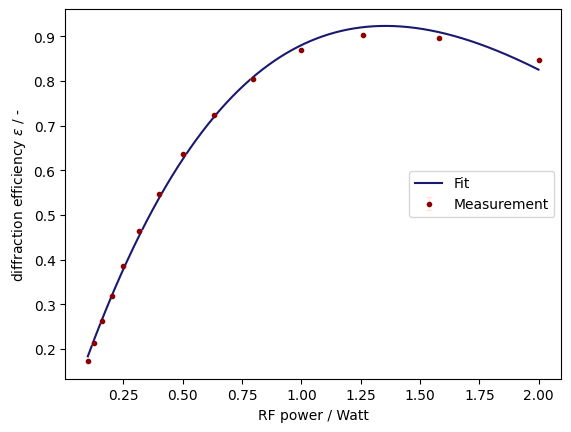

In [11]:
# for plotting 
RF_power_smooth = np.arange(RF_power.min(), RF_power.max(), 0.001)
plt.plot(RF_power_smooth, epsilon_pow(RF_power_smooth,popt[0], popt[1], popt[2]), color="midnightblue", label="Fit")
plt.errorbar(RF_power, epsilon_data_nominal, yerr=epsilon_data_unc,markersize=6,
             fmt=".", elinewidth=1, color="darkred", ecolor="mistyrose", capsize=2,label="Measurement")
plt.xlabel("RF power / Watt")
plt.ylabel(r"diffraction efficiency $\varepsilon$ / -")
plt.legend(loc='center right')
#plt.savefig("plots/epsilon.png", dpi=300)
plt.show()

# tasks after lab

#### 3.3

In [12]:
# with RF frequency change and record the power
power_noise = ufloat(0.65e-3,0.05e-3)
raw_data_3_3 = np.array([[60, ufloat(0.412,0.001) - power_noise, ufloat(6, 1)],
                         [65, ufloat(0.473,0.001) - power_noise, ufloat(6, 1)],
                         [70, ufloat(0.512,0.001) - power_noise, ufloat(6.5, 1)],
                         [75, ufloat(0.519,0.001) - power_noise, ufloat(6.5, 1)], 
                         [80, ufloat(0.540,0.001) - power_noise, ufloat(7, 1)], # due to sinc singularity
                         [85, ufloat(0.536,0.001) - power_noise, ufloat(7.5, 1)],
                         [90, ufloat(0.510,0.001) - power_noise, ufloat(8, 1)],
                         [95, ufloat(0.457,0.001) - power_noise, ufloat(8.5, 1)],
                         [100, ufloat(0.370,0.001) - power_noise, ufloat(9, 1)]])
data_3_3 = pd.DataFrame(raw_data_3_3, columns=["frequency/MHz", "power_1st/mW", "distance_0th_1st/mm"])
data_3_3

,frequency/MHz,power_1st/mW,distance_0th_1st/mm
0,60,0.4113+/-0.0010,6.0+/-1.0
1,65,0.4723+/-0.0010,6.0+/-1.0
2,70,0.5113+/-0.0010,6.5+/-1.0
3,75,0.5183+/-0.0010,6.5+/-1.0
4,80,0.5393+/-0.0010,7.0+/-1.0
5,85,0.5353+/-0.0010,7.5+/-1.0
6,90,0.5093+/-0.0010,8.0+/-1.0
7,95,0.4564+/-0.0010,8.5+/-1.0
8,100,0.3694+/-0.0010,9.0+/-1.0


Fit results: 
 A =  0.6183363064195163 +/- 0.0006508369638758015 
 Q =  13.551627364260176 +/- 0.05170989021480299


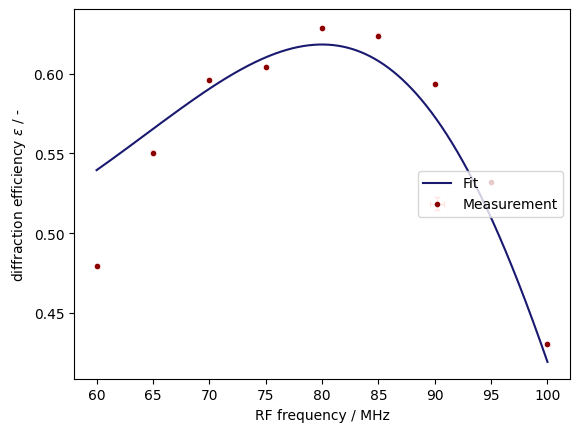

In [13]:
# diffraction efficiency with angle change
def epsilon_freq(freq, A, Q):
    F = freq / 80+1e-10 # normalized frequency detuning
    return A*(np.sin(F*(1-F)*Q/4) / (F*(1-F)*Q/4))**2

freq = np.array([data_3_3["frequency/MHz"][i] for i in range(len(data_3_3["frequency/MHz"]))])
epsilon_data = data_3_3["power_1st/mW"] / p_out

# performing fit
epsilon_data_nominal = np.array([epsilon_data[i].n for i in range(len(epsilon_data))])
epsilon_data_unc = np.array([epsilon_data[i].s for i in range(len(epsilon_data))])
popt, pcov = curve_fit(epsilon_freq, freq, epsilon_data_nominal, sigma=epsilon_data_unc, absolute_sigma=True)
print("Fit results:", "\n", "A = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), 
      "\n", "Q = ", popt[1], "+/-", np.sqrt(np.diag(pcov)[1]))

# for plotting 
freq_smooth = np.arange(freq.min(), freq.max(), 0.001)
plt.plot(freq_smooth, epsilon_freq(freq_smooth,popt[0], popt[1]), color="midnightblue", label="Fit")
plt.errorbar(freq, epsilon_data_nominal, xerr=1e-6, yerr=epsilon_data_unc,markersize=6,
             fmt=".", elinewidth=1, color="darkred", ecolor="mistyrose", capsize=2,label="Measurement")
plt.xlabel("RF frequency / MHz")
plt.ylabel(r"diffraction efficiency $\varepsilon$ / -")
plt.legend(loc='center right')
plt.show()

Fit results: 
 lambda =  0.0006652689844161678 +/- 3.0443664613403503e-05 mm


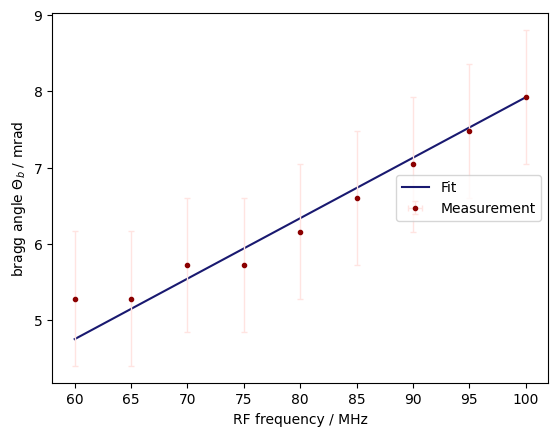

In [14]:
# frequency dependence of bragg angle
# diffraction efficiency with angle change
def bragg_ang(f_RF, lam):
    V_s = 4.2 # mm/mus 
    return 500 * lam*f_RF/V_s # lam in mm, since f_RF in MHz
    # bragg angel in mrad

freq = np.array([data_3_3["frequency/MHz"][i] for i in range(len(data_3_3["frequency/MHz"]))])
order_dist = np.array([data_3_3["distance_0th_1st/mm"][i] for i in range(len(data_3_3["distance_0th_1st/mm"]))])
bragg_data = np.array([500*atan2(order_dist[i],10*AOM_mes_dist) for i in range(len(order_dist))])

# performing fit
bragg_nominal = np.array([bragg_data[i].n for i in range(len(bragg_data))])
bragg_unc = np.array([bragg_data[i].s for i in range(len(bragg_data))])
popt, pcov = curve_fit(bragg_ang, freq, bragg_nominal, sigma=bragg_unc, absolute_sigma=True, p0=[1])
print("Fit results:", "\n", "lambda = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), "mm")

# for plotting 
freq_smooth = np.arange(freq.min(), freq.max(), 0.001)
plt.plot(freq_smooth, bragg_ang(freq_smooth,popt[0]), color="midnightblue", label="Fit")
plt.errorbar(freq, bragg_nominal, xerr=1e-6, yerr=bragg_unc,markersize=6,
             fmt=".", elinewidth=1, color="darkred", ecolor="mistyrose", capsize=2,label="Measurement")
plt.xlabel("RF frequency / MHz")
plt.ylabel(r"bragg angle $\Theta_b$ / mrad")
plt.legend(loc='center right')
#plt.savefig("plots/epsilon.png", dpi=300)
plt.show()

#### 3.4

In [15]:
# with AOM angle change and record the power
power_noise = ufloat(0.65e-3,0.05e-3)
raw_data_3_4 = np.array([[-1e-10/5, ufloat(0.746,0.001) - power_noise], # 0 from left
                         [-0.2/5, ufloat(0.714,0.001) - power_noise],
                         [-0.4/5, ufloat(0.641,0.001) - power_noise],
                         [-0.6/5, ufloat(0.522,0.001) - power_noise], 
                         [-0.8/5, ufloat(0.367,0.001) - power_noise],
                         [-1/5, ufloat(0.222,0.001) - power_noise],
                         [1e-10/5, ufloat(0.752,0.001) - power_noise], # 0 from right
                         [0.2/5, ufloat(0.743,0.001) - power_noise],
                         [0.4/5, ufloat(0.641,0.001) - power_noise],
                         [0.6/5, ufloat(0.500,0.001) - power_noise], 
                         [0.8/5, ufloat(0.387,0.001) - power_noise],
                         [1/5, ufloat(0.241,0.001) - power_noise]])
data_3_4 = pd.DataFrame(raw_data_3_4, columns=["AOM_angle/deg", "power_1st/mW"])
data_3_4

,AOM_angle/deg,power_1st/mW
0,-0.0,0.7453+/-0.0010
1,-0.04,0.7133+/-0.0010
2,-0.08,0.6403+/-0.0010
3,-0.12,0.5213+/-0.0010
4,-0.16,0.3664+/-0.0010
5,-0.2,0.2213+/-0.0010
6,0.0,0.7513+/-0.0010
7,0.04,0.7423+/-0.0010
8,0.08,0.6403+/-0.0010
9,0.12,0.4994+/-0.0010


Fit results: 
 A =  0.87927828628753 +/- 0.0006869375457096846 
 Q =  12.425262409704395 +/- 0.012147824036797893


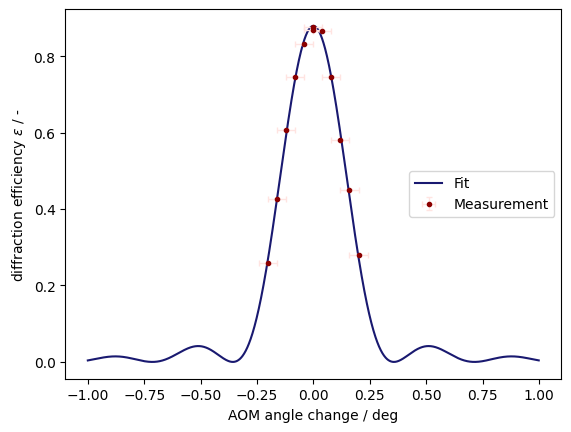

In [19]:
# diffraction efficiency with angle change
def epsilon_ang(AOM_angle, A, Q):
    Delta = AOM_angle*1e3 * np.pi / 180 / bragg.n # normalized angular error
    return A*(np.sin((Delta)*Q/4)/((Delta)*Q/4))**2

AOM_angle = np.array([data_3_4["AOM_angle/deg"][i] for i in range(len(data_3_4["AOM_angle/deg"]))])
epsilon_data = data_3_4["power_1st/mW"] / p_out

# performing fit
epsilon_data_nominal = np.array([epsilon_data[i].n for i in range(len(epsilon_data))])
epsilon_data_unc = np.array([epsilon_data[i].s for i in range(len(epsilon_data))])
popt, pcov = curve_fit(epsilon_ang, AOM_angle, epsilon_data_nominal, sigma=epsilon_data_unc, absolute_sigma=True)
print("Fit results:", "\n", "A = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), 
      "\n", "Q = ", popt[1], "+/-", np.sqrt(np.diag(pcov)[1]))

# for plotting 
AOM_angle_smooth = np.arange(-1, 1, 0.001)
plt.plot(AOM_angle_smooth, epsilon_ang(AOM_angle_smooth,popt[0], popt[1]), color="midnightblue", label="Fit")
plt.errorbar(AOM_angle, epsilon_data_nominal, xerr=1/25, yerr=epsilon_data_unc,markersize=6,
             fmt=".", elinewidth=1, color="darkred", ecolor="mistyrose", capsize=2,label="Measurement")
plt.xlabel("AOM angle change / deg")
plt.ylabel(r"diffraction efficiency $\varepsilon$ / -")
plt.legend(loc='center right')
#plt.savefig("plots/epsilon.png", dpi=300)
plt.show()

In [17]:
# with RF frequency change and record the power after optimization
power_noise = ufloat(0.65e-3,0.05e-3)
raw_data_3_5 = np.array([[60, ufloat(0.467,0.001) - power_noise],
                         [65, ufloat(0.504,0.001) - power_noise],
                         [70, ufloat(0.519,0.001) - power_noise],
                         [75, ufloat(0.532,0.001) - power_noise], 
                         [80, ufloat(0.540,0.001) - power_noise], # due to sinc singularity
                         [85, ufloat(0.547,0.001) - power_noise],
                         [90, ufloat(0.549,0.001) - power_noise],
                         [95, ufloat(0.537,0.001) - power_noise],
                         [100, ufloat(0.481,0.001) - power_noise]])
data_3_5 = pd.DataFrame(raw_data_3_5, columns=["frequency/MHz", "power_1st/mW"])
data_3_5

,frequency/MHz,power_1st/mW
0,60,0.4664+/-0.0010
1,65,0.5033+/-0.0010
2,70,0.5183+/-0.0010
3,75,0.5313+/-0.0010
4,80,0.5393+/-0.0010
5,85,0.5464+/-0.0010
6,90,0.5484+/-0.0010
7,95,0.5363+/-0.0010
8,100,0.4803+/-0.0010


80 MHz Fit results: 
 A =  0.622769758857178 +/- 0.0006340771412810704 
 Q =  7.346239421623051 +/- 0.08558091003637354
90 MHz Fit results: 
 A =  0.6436537436554234 +/- 0.0007395337844055888 
 Q =  12.48810092773174 +/- 0.08982851950378634


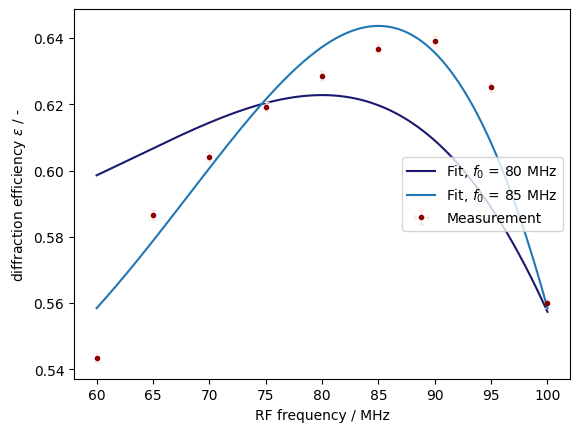

In [18]:
# diffraction efficiency with frequency change, re-optimized
def epsilon_freq(freq, A, Q):
    F = freq / 80+1e-10 # normalized frequency detuning
    return A*(np.sin(F*(1-F)*Q/4) / (F*(1-F)*Q/4))**2

freq = np.array([data_3_5["frequency/MHz"][i] for i in range(len(data_3_5["frequency/MHz"]))])
epsilon_data = data_3_5["power_1st/mW"] / p_out

# performing fit
epsilon_data_nominal = np.array([epsilon_data[i].n for i in range(len(epsilon_data))])
epsilon_data_unc = np.array([epsilon_data[i].s for i in range(len(epsilon_data))])
popt, pcov = curve_fit(epsilon_freq, freq, epsilon_data_nominal, sigma=epsilon_data_unc, absolute_sigma=True)
print("80 MHz Fit results:", "\n", "A = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), 
      "\n", "Q = ", popt[1], "+/-", np.sqrt(np.diag(pcov)[1]))

# for plotting 
freq_smooth = np.arange(freq.min(), freq.max(), 0.001)
plt.plot(freq_smooth, epsilon_freq(freq_smooth,popt[0], popt[1]), color="midnightblue", label= r"Fit, $f_0$ = 80 MHz")
plt.errorbar(freq, epsilon_data_nominal, xerr=1e-6, yerr=epsilon_data_unc,markersize=6,
             fmt=".", elinewidth=1, color="darkred", ecolor="mistyrose", capsize=2,label="Measurement")

# fit again with assumed new optimum
def epsilon_freq(freq, A, Q):
    F = freq / 85+1e-10 # normalized frequency detuning
    return A*(np.sin(F*(1-F)*Q/4) / (F*(1-F)*Q/4))**2
#perform fit
popt, pcov = curve_fit(epsilon_freq, freq, epsilon_data_nominal, sigma=epsilon_data_unc, absolute_sigma=True)
print("90 MHz Fit results:", "\n", "A = ", popt[0], "+/-", np.sqrt(np.diag(pcov)[0]), 
      "\n", "Q = ", popt[1], "+/-", np.sqrt(np.diag(pcov)[1]))
# for plotting 
freq_smooth = np.arange(freq.min(), freq.max(), 0.001)
plt.plot(freq_smooth, epsilon_freq(freq_smooth,popt[0], popt[1]), label= r"Fit, $f_0$ = 85 MHz")
plt.xlabel("RF frequency / MHz")
plt.ylabel(r"diffraction efficiency $\varepsilon$ / -")
plt.legend(loc='center right')

plt.show()